# Bag-of-Motifs tutorial for Model Interpretation

For this tutorial, we will calculate SHAP values to evaluate the contribution of each motif to the classification carried out by our model. 
SHAP stands for SHapley Additive exPlanations, SHAP values are a concept from game theory to measure the contribution of each player to a game [5]. 
It would be better to create a python virtual environment to calculate SHAP values. 
SHAP values are calculated for each motif and for each CRE. 
SHAP values can be positive or negative indicating whether they influence the prediction of the model towards the target class (positive values) or the background class (negative values).



## Create python environment

Activate python environment

We can execute the script BOM_SHAP.py to calculate and save the SHAP values of our model 

In [4]:
python BOM_SHAP.py --help

usage: BOM_SHAP.py [-h] [--xgb_model XGB_MODEL] [--train_data TRAIN_DATA]
                   [--out_file OUT_FILE]

Script to calculate and save SHAP values for a binary model

optional arguments:
  -h, --help            show this help message and exit
  --xgb_model XGB_MODEL
                        Path to XGBoost model file
  --train_data TRAIN_DATA
                        Path to training data file
  --out_file OUT_FILE   Path to output file (.txt)


In [9]:
python BOM_SHAP.py --xgb_model Cardiomyocytes_vs_other.bin --train_data Cardiomyocytes_vs_other_train.txt --out_file Cardiomyocytes_vs_other_SHAP.txt

Reading model...
Reading data...
Calculating SHAP values...
Saving SHAP values...
Done


We can see we have a SHAP value for each motif and each CRE. Columns represent different motifs, the name of the column represents the motif ID in the motif database. CRE are represented by their coordinates in the row names.

## SHAP beeswarm plot 
SHAP beeswarm plots display the SHAP values for each data point (CRE) for a specified number of features (motifs). Motifs are ranked based on the sum of the absolute SHAP values, a measure of the overall motif importance. The colour of the dots is given by the normalised value of the features (motif counts) to a range from zero to one. Using the script BOM_SHAP_beeswarm.py we can define whether to display the ID of the motif, as in the database, or a transcription factor name (default). GIMME motifs are clusters of very similar motifs recognized by different transcription factors (TF). The motif names displayed represent the first TF name included in the annotation of GIMME motifs.

In [3]:
python BOM_SHAP_beeswarm.py --help 

usage: BOM_SHAP_beeswarm.py [-h] [--xgb_model XGB_MODEL]
                            [--train_data TRAIN_DATA] [--out_file OUT_FILE]
                            [--motif_names MOTIF_NAMES] [--out_SHAP OUT_SHAP]
                            [--max_display MAX_DISPLAY] [--features FEATURES]
                            [--feature_names FEATURE_NAMES [FEATURE_NAMES ...]]
                            [--plot_type {dot,bar,violin,compact_dot}]
                            [--color COLOR] [--axis_color AXIS_COLOR]
                            [--title TITLE] [--alpha ALPHA] [--show SHOW]
                            [--sort SORT] [--color_bar COLOR_BAR]
                            [--plot_size PLOT_SIZE]
                            [--layered_violin_max_num_bins LAYERED_VIOLIN_MAX_NUM_BINS]
                            [--class_names CLASS_NAMES [CLASS_NAMES ...]]
                            [--class_inds CLASS_INDS [CLASS_INDS ...]]
                            [--color_bar_label COLOR_BAR_LABEL] [

By default the script BOM_SHAP_beeswarm.py will display motif names.

In [6]:
python BOM_SHAP_beeswarm.py --xgb_model=Cardiomyocytes_vs_other.bin --train_data=Cardiomyocytes_vs_other_train.txt --out_file=Cardiomyocytes_vs_other_SHAP_beeswarmv1.png 

Reading model...
Reading data...
Calculating SHAP values...
Reading GIMME motifs annotation...
Saving beeswarm plot...
Figure(800x950)
Done


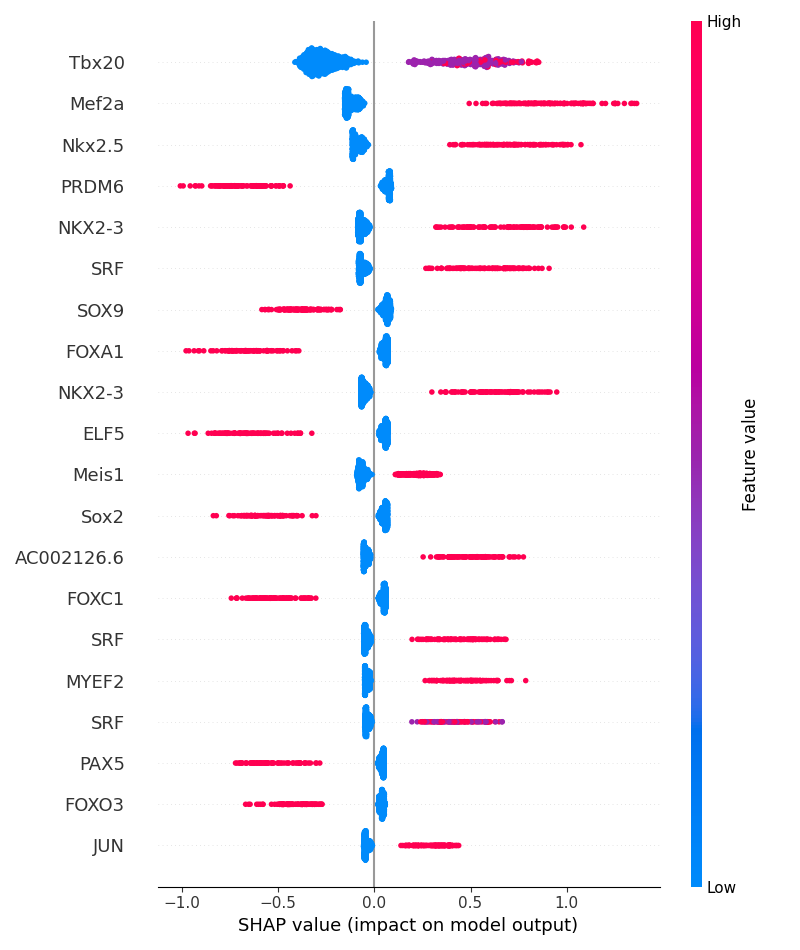

In [2]:
from IPython.display import Image

# get the image
Image("Cardiomyocytes_vs_other_SHAP_beeswarmv1.png", width=500, height=500)

We can set --motif_names to False to display motif IDs

In [13]:
python BOM_SHAP_beeswarm.py --xgb_model=Cardiomyocytes_vs_other.bin --train_data=Cardiomyocytes_vs_other_train.txt --out_file=Cardiomyocytes_vs_other_SHAP_beeswarmv2.png --motif_names=False


Reading model...
Reading data...
Calculating SHAP values...
Saving beeswarm plot...
Figure(800x950)
Done


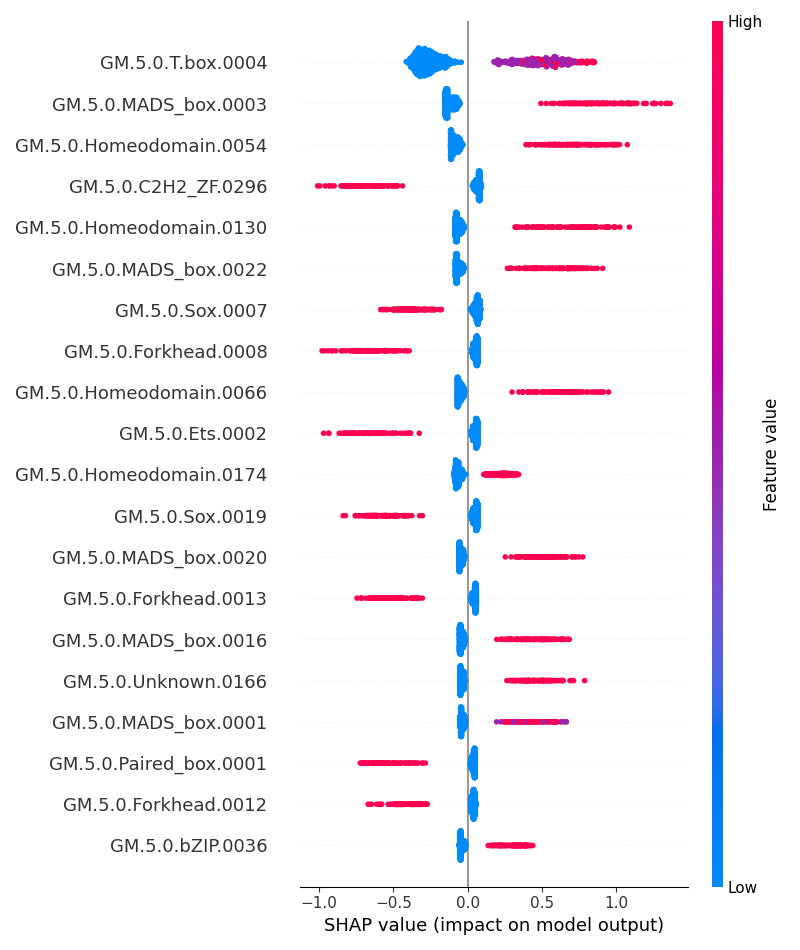

In [3]:
from IPython.display import Image

# get the image
Image("Cardiomyocytes_vs_other_SHAP_beeswarmv2.png", width=500, height=500)

## SHAP bar plot of motif importance

SHAP barplots display an overall value of feature (motif) importance, defined as the mean of absolute SHAP values for each motif. By default the top 10 features are shown. In this script we can also define whether to use motif names or motif IDs.

In [17]:
python BOM_SHAP_barplot.py --help

usage: BOM_SHAP_barplot.py [-h] [--xgb_model XGB_MODEL]
                           [--train_data TRAIN_DATA] [--out_file OUT_FILE]
                           [--motif_names MOTIF_NAMES] [--out_SHAP OUT_SHAP]
                           [--max_display MAX_DISPLAY]
                           [--order ORDER [ORDER ...]]
                           [--hclustering HCLUSTERING]
                           [--clustering_cutoff CLUSTERING_CUTOFF]
                           [--merge_cohorts MERGE_COHORTS]
                           [--show_data SHOW_DATA] [--show SHOW]

Script to produce a SHAP barplot of overall motif importance in a BOM binary
model.

optional arguments:
  -h, --help            show this help message and exit
  --xgb_model XGB_MODEL
                        Path to XGBoost model file
  --train_data TRAIN_DATA
                        Path to training data file
  --out_file OUT_FILE   Path to output PDF or png file
  --motif_names MOTIF_NAMES
                        Whether to use 

In [18]:
python BOM_SHAP_barplot.py --xgb_model=Cardiomyocytes_vs_other.bin --train_data=Cardiomyocytes_vs_other_train.txt --out_file=Cardiomyocytes_vs_other_bar1.png --max_display=15 --motif_names=True

Reading model...
Reading motif counts...
Calculating SHAP values of motif contribution...
Reading GIMME motifs annotation...
Saving plot...
Figure(800x900)
Done


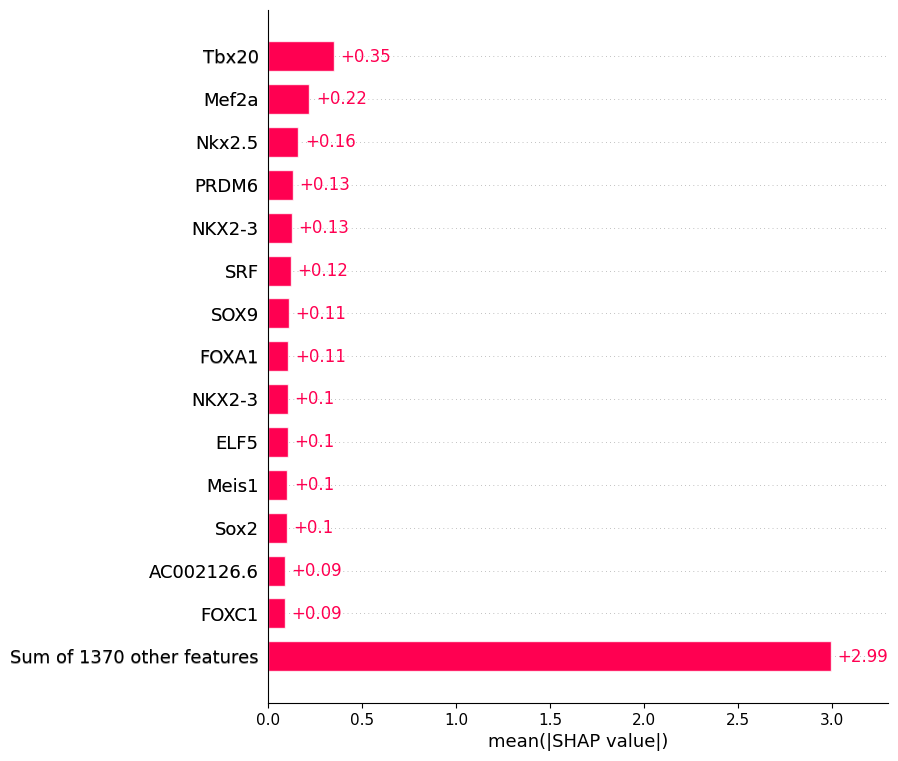

In [4]:
from IPython.display import Image

# get the image
Image("Cardiomyocytes_vs_other_bar1.png", width=500, height=500)

## Waterfall plot of local motif importance 

Given that SHAP values are calculated for each CRE, we can evaluate the local explanation of individual CRE. For this, we will plot a waterfall plot. This kind of plot will show in different colors the sign (direction) of SHAP values for indivisual CREs. The SHAP and feature value are shown for each motif. The feature value meaning the count of motifs of every type in the CRE sequence. We have selected three cardiomyocyte-specific CRE as examples. As in previous plots, motifs are ranked based on their absolute SHAP values.

In [20]:
python BOM_SHAP_waterfall.py --help

usage: BOM_SHAP_waterfall.py [-h] [--xgb_model XGB_MODEL]
                             [--train_data TRAIN_DATA] [--regions REGIONS]
                             [--motif_names MOTIF_NAMES]
                             [--max_display MAX_DISPLAY] [--show SHOW]
                             [--out_format OUT_FORMAT]

Script to perform operations on a model.

optional arguments:
  -h, --help            show this help message and exit
  --xgb_model XGB_MODEL
                        Path to XGBoost model file
  --train_data TRAIN_DATA
                        Path to training data file
  --regions REGIONS     Path to regions IDs for local explanation
  --motif_names MOTIF_NAMES
                        Whether to use the motif names instead of motif IDs
                        (default: True)
  --max_display MAX_DISPLAY
                        Number of motifs to display (default: 10)
  --show SHOW           Whether to display the plot
  --out_format OUT_FORMAT
                        Format 

In [5]:
python BOM_SHAP_waterfall.py --xgb_model=Cardiomyocytes_vs_other.bin --train_data=Cardiomyocytes_vs_other_train.txt --regions=CRE_sample_card

Reading model...
Reading data...
Calculating SHAP values...
Reading GIMME motifs annotation...
Saving beeswarm plot...
Saving 1_39855911_39856411_waterfall.png ...
Figure(800x650)
Saving 2_157923362_157923862_waterfall.png ...
Figure(800x650)
Saving 9_23116275_23116775_waterfall.png ...
Figure(800x650)
Done


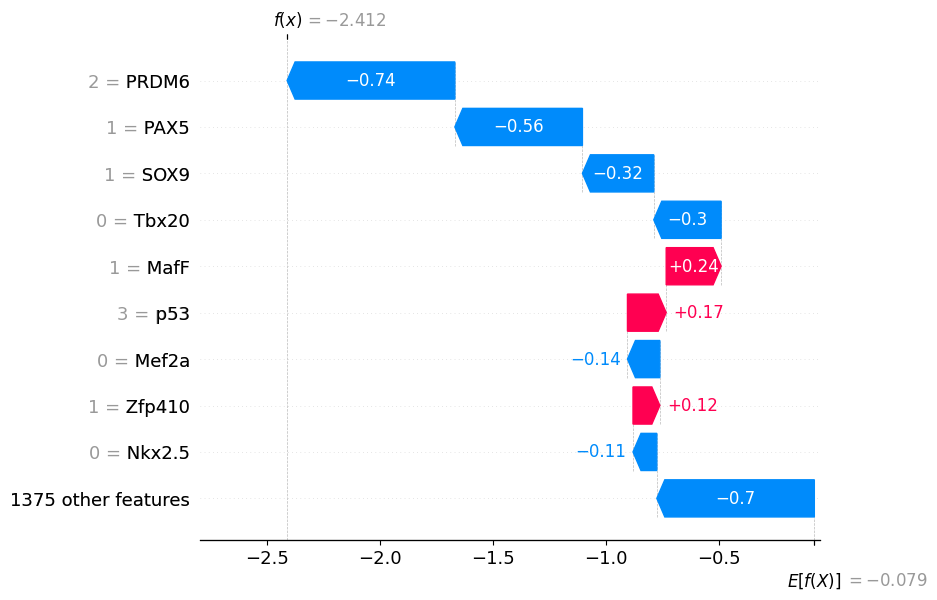

In [7]:
from IPython.display import Image
# get the image
Image("1_39855911_39856411_waterfall.png", width=500, height=500)

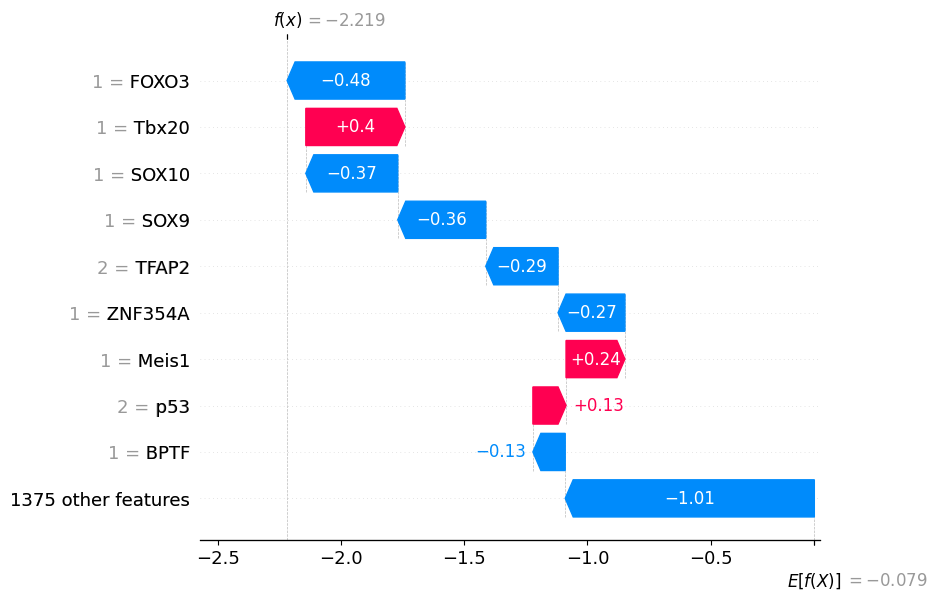

In [8]:
Image("2_157923362_157923862_waterfall.png", width=500, height=500)

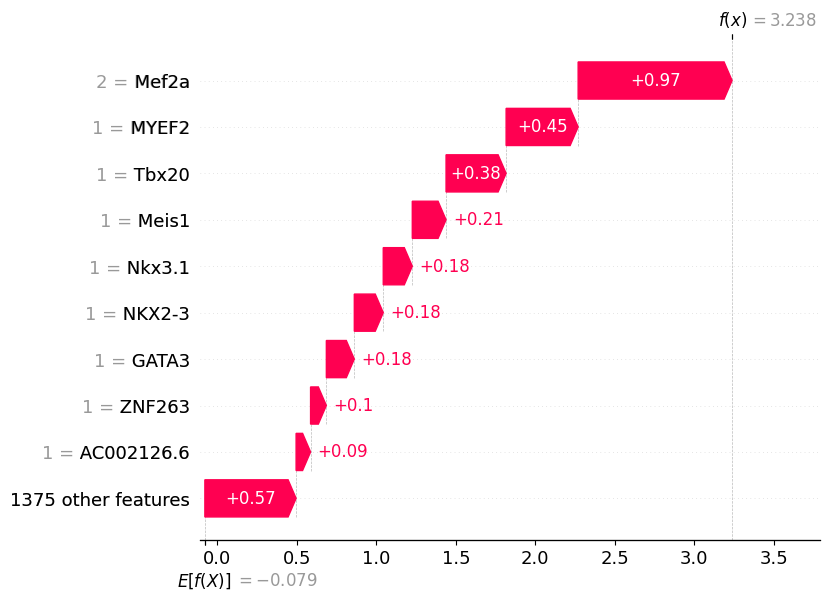

In [9]:
Image("9_23116275_23116775_waterfall.png", width=500, height=500)

## Rank motifs by their overall importance in CRE binary classification

The motif ranking implemented in SHAP plots could be useful for multiple downstream analysis. Using the script rank_motifs.R we can get this ranking based on either the sum of absolute SHAP or mean of the absolute SHAP per motif. Both ranking metrics are highly consistent.

In [2]:
Rscript rank_motifs.R --help

Usage: Rscript rank_motifs.R [parameters]

Parameters:
  --shap_file=<file>       Path to the SHAP values file
  --out_file=<file>      Path to save the motifs ranked by SHAP
  --rank_type=<file>      Rank type. Either 'sum' or 'mean' 



In [5]:
Rscript rank_motifs.R --shap_file=Cardiomyocytes_vs_other_SHAP.txt --out_file=Cardiomyocytes_vs_other_Motif_rank1 --rank_type=mean

Reading SHAP values...
Ranking motifs by SHAP...
Saving ranked motifs...
Done


In [6]:
Rscript rank_motifs.R --shap_file=Cardiomyocytes_vs_other_SHAP.txt --out_file=Cardiomyocytes_vs_other_Motif_rank2 --rank_type=sum

Reading SHAP values...
Ranking motifs by SHAP...
Saving ranked motifs...
Done


In [10]:
head Cardiomyocytes_vs_other_Motif_rank1

mean_abs_SHAP
GM.5.0.T.box.0004 0.348914314613564
GM.5.0.MADS_box.0003 0.217864508280769
GM.5.0.Homeodomain.0054 0.159735312075843
GM.5.0.C2H2_ZF.0296 0.130275805270133
GM.5.0.Homeodomain.0130 0.12624345631612
GM.5.0.MADS_box.0022 0.120348175534041
GM.5.0.Sox.0007 0.10757551501981
GM.5.0.Forkhead.0008 0.106609145923373
GM.5.0.Homeodomain.0066 0.104904772688682


In [11]:
head Cardiomyocytes_vs_other_Motif_rank2

sum_abs_SHAP
GM.5.0.T.box.0004 362.521972883493
GM.5.0.MADS_box.0003 226.361224103719
GM.5.0.Homeodomain.0054 165.964989246801
GM.5.0.C2H2_ZF.0296 135.356561675668
GM.5.0.Homeodomain.0130 131.166951112449
GM.5.0.MADS_box.0022 125.041754379869
GM.5.0.Sox.0007 111.770960105583
GM.5.0.Forkhead.0008 110.766902614385
GM.5.0.Homeodomain.0066 108.996058823541


### References

1. Pijuan-Sala, B., Wilson, N. K., Xia, J., Hou, X., Hannah, R. L., Kinston, S., ... & Göttgens, B. (2020). Single-cell chromatin accessibility maps reveal regulatory programs driving early mouse organogenesis. Nature cell biology, 22(4), 487-497.
2. Bruse, N., & Heeringen, S. J. V. (2018). GimmeMotifs: an analysis framework for transcription factor motif analysis. BioRxiv, 474403.
3. Charles E. Grant, Timothy L. Bailey and William Stafford Noble, "FIMO: Scanning for occurrences of a given motif", Bioinformatics 27(7):1017-1018, 2011. [full text]
4. Quinlan, A. R., & Hall, I. M. (2010). BEDTools: a flexible suite of utilities for comparing genomic features. Bioinformatics, 26(6), 841-842.
5. Lundberg, S. M., Erion, G., Chen, H., DeGrave, A., Prutkin, J. M., Nair, B., ... & Lee, S. I. (2020). From local explanations to global understanding with explainable AI for trees. Nature machine intelligence, 2(1), 56-67.